In [2]:
library(tidyverse)

In [4]:
df =read_csv('./results/mortality_test_data.csv', col_type=cols())

Warning message:
"Missing column names filled in: 'X1' [1]"

In [6]:
head(df)

X1,icustay_id,interval_start_time,interval_end_time,reward,hospital_expire_flag,phy_action_Qvalue,best_action_Qvalue,best_action
0,253656,2162-05-15 16:47:00,2162-05-15 20:47:00,0,0,8.111915,10.932526,2
1,253656,2162-05-15 20:47:00,2162-05-16 00:47:00,0,0,8.083713,9.901822,2
2,253656,2162-05-16 00:47:00,2162-05-16 04:47:00,0,0,8.083713,9.901822,2
3,253656,2162-05-16 04:47:00,2162-05-16 08:47:00,0,0,8.083713,9.901822,2
4,253656,2162-05-16 08:47:00,2162-05-16 12:47:00,0,0,8.083713,9.901822,2
5,253656,2162-05-16 12:47:00,2162-05-16 16:47:00,0,0,8.157204,10.817661,2


In [8]:
library(lubridate)
temp <- df %>%
        group_by(icustay_id) %>%
        mutate(relative_time = difftime(interval_start_time, min(interval_start_time) + hours(24), units = 'hours')) %>%
        ungroup() 


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [9]:
head(temp)

X1,icustay_id,interval_start_time,interval_end_time,reward,hospital_expire_flag,phy_action_Qvalue,best_action_Qvalue,best_action,relative_time
0,253656,2162-05-15 16:47:00,2162-05-15 20:47:00,0,0,8.111915,10.932526,2,-24 hours
1,253656,2162-05-15 20:47:00,2162-05-16 00:47:00,0,0,8.083713,9.901822,2,-20 hours
2,253656,2162-05-16 00:47:00,2162-05-16 04:47:00,0,0,8.083713,9.901822,2,-16 hours
3,253656,2162-05-16 04:47:00,2162-05-16 08:47:00,0,0,8.083713,9.901822,2,-12 hours
4,253656,2162-05-16 08:47:00,2162-05-16 12:47:00,0,0,8.083713,9.901822,2,-8 hours
5,253656,2162-05-16 12:47:00,2162-05-16 16:47:00,0,0,8.157204,10.817661,2,-4 hours


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


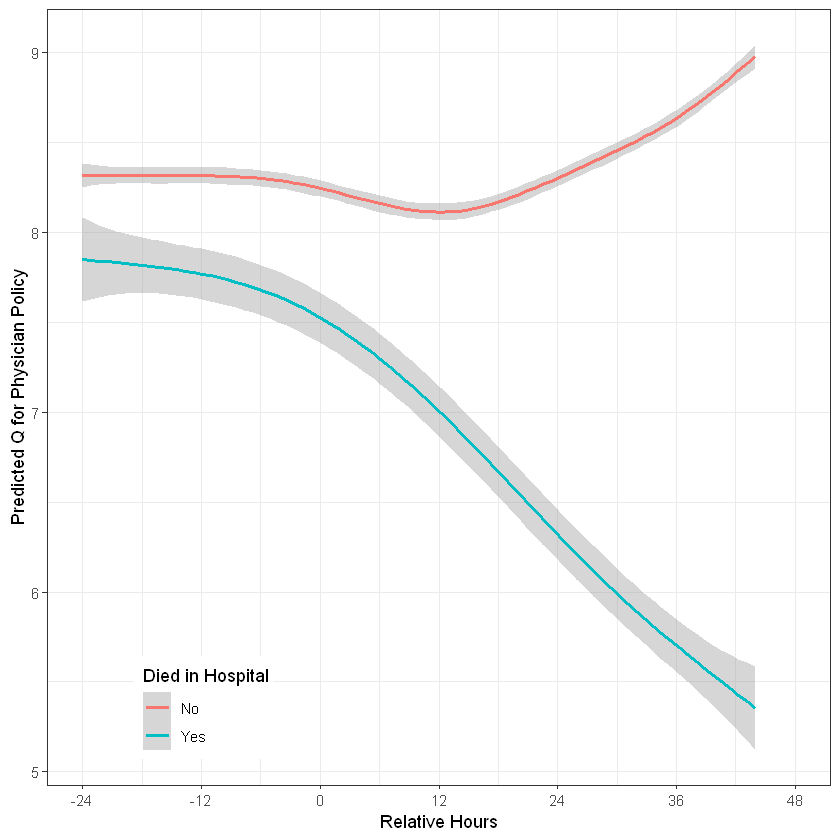

In [10]:
temp %>%
        ggplot(aes(relative_time, phy_action_Qvalue, color = as.factor(hospital_expire_flag))) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Predicted Q for Physician Policy') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


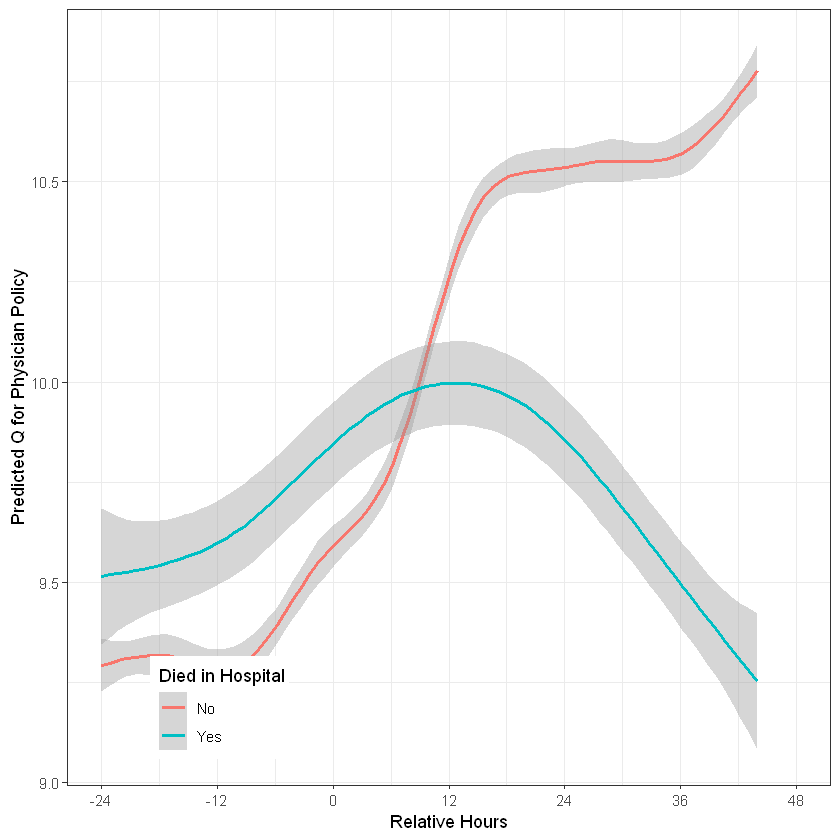

In [11]:
temp %>%
        ggplot(aes(relative_time, best_action_Qvalue, color = as.factor(hospital_expire_flag))) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Predicted Q for Physician Policy') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


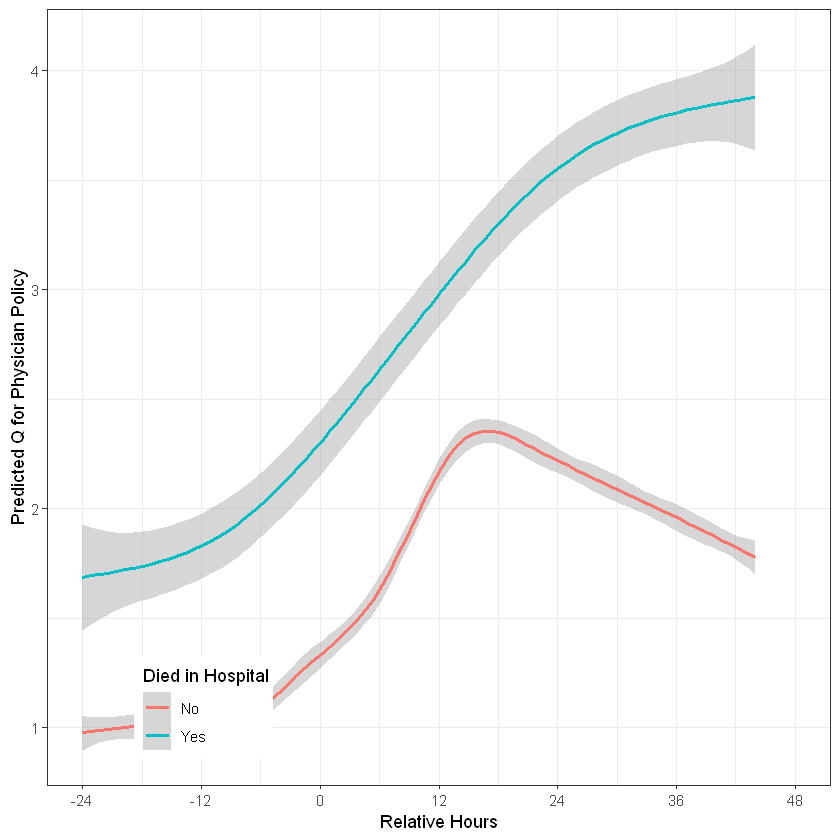

In [12]:
temp %>%
        ggplot(aes(relative_time, best_action_Qvalue - phy_action_Qvalue, 
                   color = as.factor(hospital_expire_flag))) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Predicted Q for Physician Policy') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48))

In [13]:
head(df)

X1,icustay_id,interval_start_time,interval_end_time,reward,hospital_expire_flag,phy_action_Qvalue,best_action_Qvalue,best_action
0,253656,2162-05-15 16:47:00,2162-05-15 20:47:00,0,0,8.111915,10.932526,2
1,253656,2162-05-15 20:47:00,2162-05-16 00:47:00,0,0,8.083713,9.901822,2
2,253656,2162-05-16 00:47:00,2162-05-16 04:47:00,0,0,8.083713,9.901822,2
3,253656,2162-05-16 04:47:00,2162-05-16 08:47:00,0,0,8.083713,9.901822,2
4,253656,2162-05-16 08:47:00,2162-05-16 12:47:00,0,0,8.083713,9.901822,2
5,253656,2162-05-16 12:47:00,2162-05-16 16:47:00,0,0,8.157204,10.817661,2


In [14]:
temp2 <- temp %>% gather(Q_type, value = Q, phy_action_Qvalue, best_action_Qvalue)

In [15]:
head(temp2)

X1,icustay_id,interval_start_time,interval_end_time,reward,hospital_expire_flag,best_action,relative_time,Q_type,Q
0,253656,2162-05-15 16:47:00,2162-05-15 20:47:00,0,0,2,-24 hours,phy_action_Qvalue,8.111915
1,253656,2162-05-15 20:47:00,2162-05-16 00:47:00,0,0,2,-20 hours,phy_action_Qvalue,8.083713
2,253656,2162-05-16 00:47:00,2162-05-16 04:47:00,0,0,2,-16 hours,phy_action_Qvalue,8.083713
3,253656,2162-05-16 04:47:00,2162-05-16 08:47:00,0,0,2,-12 hours,phy_action_Qvalue,8.083713
4,253656,2162-05-16 08:47:00,2162-05-16 12:47:00,0,0,2,-8 hours,phy_action_Qvalue,8.083713
5,253656,2162-05-16 12:47:00,2162-05-16 16:47:00,0,0,2,-4 hours,phy_action_Qvalue,8.157204


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


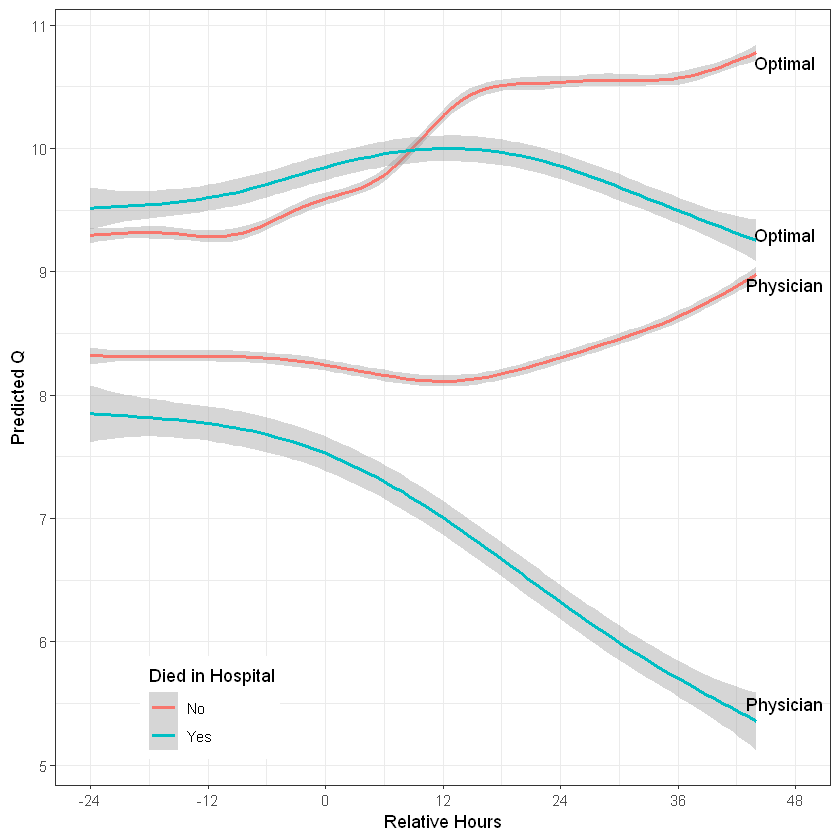

In [22]:
temp2 %>%
        ggplot(aes(relative_time, Q, 
                   color = as.factor(hospital_expire_flag),
                   shape = Q_type)) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Predicted Q') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48)) +
        annotate('text', label = 'Optimal', x = 47, y = 10.7) + 
        annotate('text', label = 'Optimal', x = 47, y = 9.3) + 
        annotate('text', label = 'Physician', x = 47, y = 8.9) + 
        annotate('text', label = 'Physician', x = 47, y = 5.5) #+ 
#         ylim(10, 15)